In [46]:
import numpy as np

from src.dataset import Dataset
from src.fit.kineticmodel import FirstOrderModel

import matplotlib.pyplot as plt


# fname = "/Users/dominikmadea/Documents/Python + JS/pyTSA/gui/src/plotter/wasm/FLD_DMRK23-3E+MB in MeOH.csv"
fname = r"C:\Users\domin\OneDrive - OIST\Projects\Test files\Femto\2023_08_07_3Z_MeOH_387_01-avrg.txt"


c:\Users\domin\Documents\Python + JS\pyTSA\pyTSA\src\plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


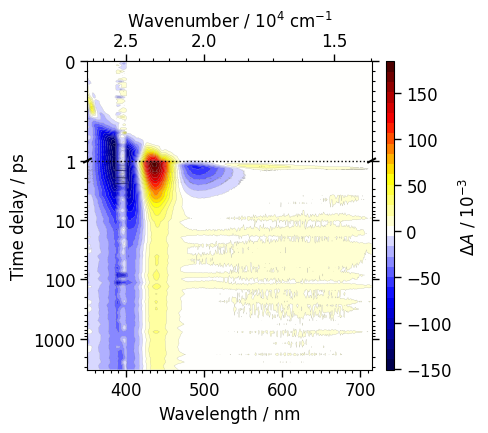

In [47]:
d = Dataset.from_file(fname, delimiter='\t', transpose=True)
model = FirstOrderModel()
d.set_model(model)
d.plot_data(plot_chirp_corrected=False, symlog=True)

In [86]:
model.update_options(n_species=1, include_chirp=False, include_irf=True, include_artifacts=False)
model.params['t0'].value = 1
# model.params['tau1'].value = 1

model.params

name,value,initial value,min,max,vary
t0,1.00000000,0,-inf,inf,True
FWHM,0.15000000,0.15,0.00000000,inf,True
tau1,0.10000000,0.1,0.00000000,inf,True


In [87]:
lifetimes = np.logspace(-1, 5, 100)
LDM, fit = model.calculate_LDM_ridge(lifetimes)

ValueError: shapes (100,175) and (374,175) not aligned: 175 (dim 1) != 374 (dim 0)

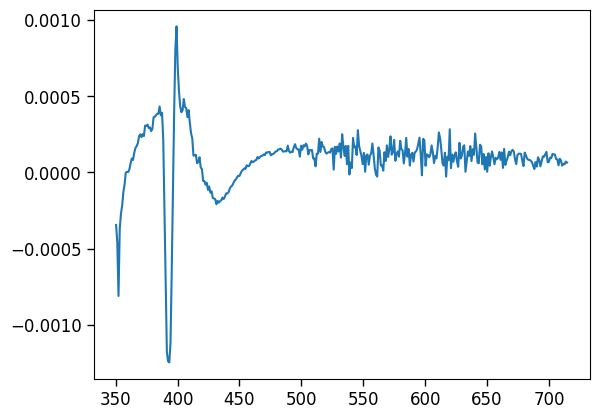

In [85]:
plt.plot(d.wavelengths, LDM[-50])
plt.show()

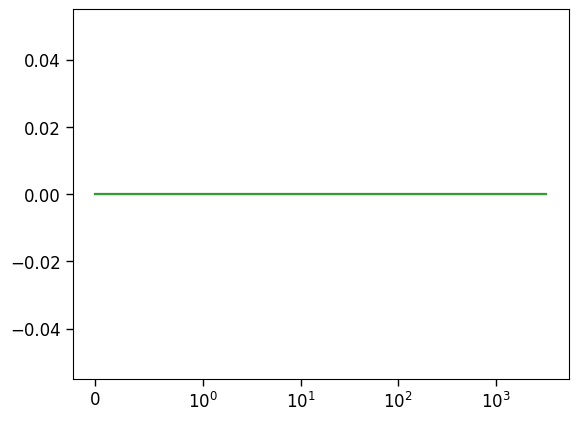

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.

In [74]:
C = model.simulate()

plt.plot(d.times, C[-100])
plt.xscale('symlog', linthresh=1)
plt.show()

In [12]:
model.update_options(include_irf=True, include_variable_fwhm=True, chirp_type='poly')
model.estimate_chirp(np.asarray([300, 400, 500, 600]), np.asarray([2, 2.1, 2.5, 2.6]))
model.params

IndexError: index 5 is out of bounds for axis 0 with size 5

/Users/dominikmadea/Documents/Python + JS/pyTSA/pyTSA/src/plot.py:194: RuntimeWarning: divide by zero encountered in divide
  secondary_ax = ax.secondary_xaxis('top', functions=(lambda x: factor / x, lambda x: 1 / (factor * x)))


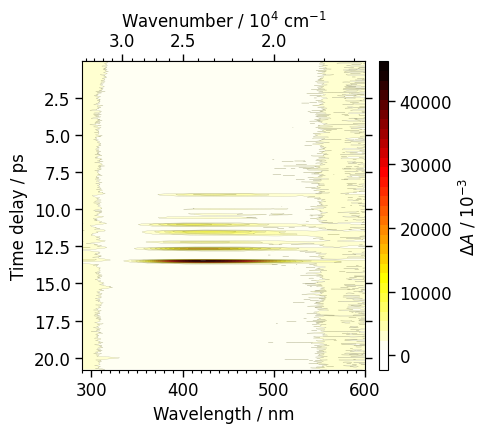

In [3]:
d.plot_data(plot_chirp_corrected=False, cmap='hot_r')
